In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#Importing the CSV file we'll be using
training_data = pd.read_csv('inputs/train.csv', sep=',')
training_data = training_data.drop(['AnimalID', 'DateTime', 'OutcomeSubtype'], axis=1) #Drop columns that will not be utilized

test_data = pd.read_csv('inputs/test.csv', sep=',')
test_data = test_data.drop(['DateTime'], axis=1) #Drop columns that will not be utilized

test_data.head(10)

,ID,Name,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,Dog,Neutered Male,2 years,Miniature Poodle Mix,White
5,6,Beau,Dog,Neutered Male,3 years,Beagle Mix,Brown/White
6,7,Bobo,Cat,Neutered Male,13 years,Domestic Medium Hair Mix,Brown Tabby/White
7,8,Abby,Cat,Spayed Female,6 months,Domestic Shorthair Mix,Brown Tabby
8,9,Ruby Grace,Dog,Spayed Female,3 months,Cairn Terrier,Black/Cream
9,10,Ruby,Dog,Spayed Female,1 year,Pit Bull Mix,Brown/White


In [2]:
#Below we will calculate the possible values for th column "AgeuponOutcome"
#The values will be transformed to their values in days, opposed to their current nominal format

age_unique_values_training = training_data['AgeuponOutcome'].unique()
age_unique_values_test = test_data['AgeuponOutcome'].unique()

def get_age_dict(age_unique_values):
    age_days_dict = {}
    for age_value in age_unique_values:

        age_days = 0

        if type(age_value) == float:
            print('nan') #NaN will be treated below

        else:
            arr = age_value.split(' ')
            age = int(arr[0]) #Age portion of the data

            if 'year' in age_value:
                age *= 365 # Age in days

            elif 'month' in age_value:
                age *= 30 # Age in days

            elif 'week' in age_value:
                age *= 7 # Age in days

            elif 'day' in age_value:
                age *= 1 # Age in days

            age_days_dict.update({age_value : age})
        
    return age_days_dict

age_days_dict = get_age_dict(age_unique_values_training)
age_days_dict_test = get_age_dict(age_unique_values_test)
            
#The dict created with all possible values
print(age_days_dict)
print(age_days_dict_test)

nan
nan
{'4 days': 4, '1 weeks': 7, '2 years': 730, '4 months': 120, '10 years': 3650, '7 months': 210, '5 weeks': 35, '11 months': 330, '20 years': 7300, '6 months': 180, '19 years': 6935, '8 months': 240, '17 years': 6205, '1 week': 7, '11 years': 4015, '4 years': 1460, '18 years': 6570, '1 day': 1, '14 years': 5110, '13 years': 4745, '16 years': 5840, '9 years': 3285, '6 years': 2190, '2 days': 2, '7 years': 2555, '3 days': 3, '6 days': 6, '3 years': 1095, '2 months': 60, '1 year': 365, '4 weeks': 28, '0 years': 0, '12 years': 4380, '5 years': 1825, '5 days': 5, '8 years': 2920, '5 months': 150, '3 months': 90, '10 months': 300, '3 weeks': 21, '1 month': 30, '2 weeks': 14, '15 years': 5475, '9 months': 270}
{'4 days': 4, '2 years': 730, '4 months': 120, '10 years': 3650, '7 months': 210, '5 weeks': 35, '11 months': 330, '20 years': 7300, '6 months': 180, '1 month': 30, '8 months': 240, '17 years': 6205, '1 week': 7, '11 years': 4015, '4 years': 1460, '18 years': 6570, '1 day': 1, '1

In [3]:
#Creating a new column with the age value represented in days
training_data = training_data.assign(DaysUponOutcome = lambda x: x.AgeuponOutcome.replace(age_days_dict))
training_data = training_data.drop('AgeuponOutcome', axis=1) #Column will not be utilized anymore, so drop it

test_data = test_data.assign(DaysUponOutcome = lambda x: x.AgeuponOutcome.replace(age_days_dict_test))
test_data = test_data.drop('AgeuponOutcome', axis=1) #Column will not be utilized anymore, so drop it

#Treating NaNs from the new column
training_data['DaysUponOutcome'] = training_data['DaysUponOutcome'].fillna(-1)
test_data['DaysUponOutcome'] = test_data['DaysUponOutcome'].fillna(-1)

training_data.head(10)

,Name,OutcomeType,AnimalType,SexuponOutcome,Breed,Color,DaysUponOutcome
0,Hambone,Return_to_owner,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,365.0
1,Emily,Euthanasia,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,365.0
2,Pearce,Adoption,Dog,Neutered Male,Pit Bull Mix,Blue/White,730.0
3,NaN,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,21.0
4,NaN,Transfer,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,730.0
5,Elsa,Transfer,Dog,Intact Female,Cairn Terrier/Chihuahua Shorthair,Black/Tan,30.0
6,Jimmy,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Blue Tabby,21.0
7,NaN,Transfer,Cat,Unknown,Domestic Shorthair Mix,Brown Tabby,21.0
8,Lucy,Adoption,Dog,Spayed Female,American Pit Bull Terrier Mix,Red/White,150.0
9,NaN,Adoption,Dog,Spayed Female,Cairn Terrier,White,365.0


In [4]:
#Creating a new column telling us if the animal has a name
training_data = training_data.assign(HasName = lambda x: x.Name.notnull())
training_data = training_data.drop('Name', axis=1) #Column will not be utilized anymore, so drop it

test_data = test_data.assign(HasName = lambda x: x.Name.notnull())
test_data = test_data.drop('Name', axis=1) #Column will not be utilized anymore, so drop it

training_data.head(10)

,OutcomeType,AnimalType,SexuponOutcome,Breed,Color,DaysUponOutcome,HasName
0,Return_to_owner,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,365.0,True
1,Euthanasia,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,365.0,True
2,Adoption,Dog,Neutered Male,Pit Bull Mix,Blue/White,730.0,True
3,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,21.0,False
4,Transfer,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,730.0,False
5,Transfer,Dog,Intact Female,Cairn Terrier/Chihuahua Shorthair,Black/Tan,30.0,True
6,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Blue Tabby,21.0,True
7,Transfer,Cat,Unknown,Domestic Shorthair Mix,Brown Tabby,21.0,False
8,Adoption,Dog,Spayed Female,American Pit Bull Terrier Mix,Red/White,150.0,True
9,Adoption,Dog,Spayed Female,Cairn Terrier,White,365.0,False


In [5]:
sex_dict = {'Neutered Male' : 'Male', 'Intact Male' : 'Male', 'Spayed Female' : 'Female', 
            'Intact Female' : 'Female', 'Unknown' : 'Unknown', '' : 'Unknown'}

castrated_dict = {'Neutered Male' : True, 'Intact Male' : False, 'Spayed Female' : True, 
                   'Intact Female' : False, 'Unknown' : 'Unknown', '' : 'Unknown'}

#Creating new columns to separate the animal's sex informations
training_data = training_data.assign(Sex = lambda x: x.SexuponOutcome.replace(sex_dict))
training_data = training_data.assign(Castrated = lambda x: x.SexuponOutcome.replace(castrated_dict))

training_data = training_data.drop('SexuponOutcome', axis=1) #Column will not be utilized anymore, so drop it

test_data = test_data.assign(Sex = lambda x: x.SexuponOutcome.replace(sex_dict))
test_data = test_data.assign(Castrated = lambda x: x.SexuponOutcome.replace(castrated_dict))

test_data = test_data.drop('SexuponOutcome', axis=1) #Column will not be utilized anymore, so drop it

training_data.head(10)

,OutcomeType,AnimalType,Breed,Color,DaysUponOutcome,HasName,Sex,Castrated
0,Return_to_owner,Dog,Shetland Sheepdog Mix,Brown/White,365.0,True,Male,True
1,Euthanasia,Cat,Domestic Shorthair Mix,Cream Tabby,365.0,True,Female,True
2,Adoption,Dog,Pit Bull Mix,Blue/White,730.0,True,Male,True
3,Transfer,Cat,Domestic Shorthair Mix,Blue Cream,21.0,False,Male,False
4,Transfer,Dog,Lhasa Apso/Miniature Poodle,Tan,730.0,False,Male,True
5,Transfer,Dog,Cairn Terrier/Chihuahua Shorthair,Black/Tan,30.0,True,Female,False
6,Transfer,Cat,Domestic Shorthair Mix,Blue Tabby,21.0,True,Male,False
7,Transfer,Cat,Domestic Shorthair Mix,Brown Tabby,21.0,False,Unknown,Unknown
8,Adoption,Dog,American Pit Bull Terrier Mix,Red/White,150.0,True,Female,True
9,Adoption,Dog,Cairn Terrier,White,365.0,False,Female,True


In [6]:
ncount = len(training_data)

#Add percentages to the bar graphs
def add_percentages_to_graph(ax, ncount):
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

In [7]:
color_values = training_data['Color']
color1 = []
color2 = []
coat  = []

color_set = set(["Apricot", "Black", "Blue", "Brown","Buff", "Chocolate" , "Cream", "Fawn", "Flame", 
                "Gold" ,"Gray", "Lilac", "Liver" , "Lynx", "Orange", "Pink" ,"Red", "Rudy","Seal",
                "Silver", "Smoke", "Tan", "White", "Yellow"]) 
coat_set = set(["Agouti", "Brindle", "Calico", "Merle", "Point", "Sable", 
               "Tick", "Tabby", "Tiger", "Torbie", "Tortie", "Tricolor"])

def is_color( thing ):
    if thing in color_set:
        return True
    else:
        return False

for color_value in color_values:
    new_value = color_value.replace('/', ' ').split(' ')
    colors = set()
    coats = set()
    for thing in new_value:
        if is_color(thing):
            colors.add(thing)
        else:
            coats.add(thing)
    color_list = list(sorted(colors))
    coat_list  = list(sorted(coats ))
    
    if len(color_list) == 0:
        color_list.append("None")
        color_list.append("None")
    elif len(color_list) == 1:
        color_list.append("None")
        
    if len(coat_list) == 0:
        coat_list.append("None")
    
    color2.append(color_list.pop())
    color1.append(color_list.pop())
    coat.append(coat_list.pop())
    
training_data = training_data.assign(Color1=color1, Color2 = color2, Coat = coat)
training_data = training_data.drop('Color', axis=1)

color_values = training_data['Coat']

i = 0
for color in color_values:
    if color != "None":
        i = i+1
        
training_data.head(10)

,OutcomeType,AnimalType,Breed,DaysUponOutcome,HasName,Sex,Castrated,Coat,Color1,Color2
0,Return_to_owner,Dog,Shetland Sheepdog Mix,365.0,True,Male,True,None,Brown,White
1,Euthanasia,Cat,Domestic Shorthair Mix,365.0,True,Female,True,Tabby,Cream,None
2,Adoption,Dog,Pit Bull Mix,730.0,True,Male,True,None,Blue,White
3,Transfer,Cat,Domestic Shorthair Mix,21.0,False,Male,False,None,Blue,Cream
4,Transfer,Dog,Lhasa Apso/Miniature Poodle,730.0,False,Male,True,None,Tan,None
5,Transfer,Dog,Cairn Terrier/Chihuahua Shorthair,30.0,True,Female,False,None,Black,Tan
6,Transfer,Cat,Domestic Shorthair Mix,21.0,True,Male,False,Tabby,Blue,None
7,Transfer,Cat,Domestic Shorthair Mix,21.0,False,Unknown,Unknown,Tabby,Brown,None
8,Adoption,Dog,American Pit Bull Terrier Mix,150.0,True,Female,True,None,Red,White
9,Adoption,Dog,Cairn Terrier,365.0,False,Female,True,None,White,None


In [8]:
color_values = test_data['Color']
color1 = []
color2 = []
coat  = []

def is_color( thing ):
    if thing in color_set:
        return True
    else:
        return False

for color_value in color_values:
    new_value = color_value.replace('/', ' ').split(' ')
    colors = set()
    coats = set()
    for thing in new_value:
        if is_color(thing):
            colors.add(thing)
        else:
            coats.add(thing)
    color_list = list(sorted(colors))
    coat_list  = list(sorted(coats ))
    
    if len(color_list) == 0:
        color_list.append("None")
        color_list.append("None")
    elif len(color_list) == 1:
        color_list.append("None")
        
    if len(coat_list) == 0:
        coat_list.append("None")
    
    color2.append(color_list.pop())
    color1.append(color_list.pop())
    coat.append(coat_list.pop())
    
test_data = test_data.assign(Color1=color1, Color2 = color2, Coat = coat)
test_data = test_data.drop('Color', axis=1)

color_values = test_data['Coat']

i = 0
for color in color_values:
    if color != "None":
        i = i+1
        
test_data.head(10)

,ID,AnimalType,Breed,DaysUponOutcome,HasName,Sex,Castrated,Coat,Color1,Color2
0,1,Dog,Labrador Retriever Mix,300.0,True,Female,False,None,Red,White
1,2,Dog,German Shepherd/Siberian Husky,730.0,True,Female,True,None,Black,Tan
2,3,Cat,Domestic Shorthair Mix,365.0,True,Male,True,Tabby,Brown,None
3,4,Dog,Collie Smooth Mix,120.0,True,Male,False,Tricolor,None,None
4,5,Dog,Miniature Poodle Mix,730.0,True,Male,True,None,White,None
5,6,Dog,Beagle Mix,1095.0,True,Male,True,None,Brown,White
6,7,Cat,Domestic Medium Hair Mix,4745.0,True,Male,True,Tabby,Brown,White
7,8,Cat,Domestic Shorthair Mix,180.0,True,Female,True,Tabby,Brown,None
8,9,Dog,Cairn Terrier,90.0,True,Female,True,None,Black,Cream
9,10,Dog,Pit Bull Mix,365.0,True,Female,True,None,Brown,White


In [9]:
#Separates breeds into base characteristics
breeds = ['Blue Lacy','Queensland Heeler','Rhod Ridgeback','Retriever','Chinese Sharpei','Black Mouth Cur','Catahoula','Staffordshire','Affenpinscher','Afghan Hound','Airedale Terrier','Akita','Australian Kelpie','Alaskan Malamute','English Bulldog','American Bulldog','American English Coonhound','American Eskimo Dog (Miniature)','American Eskimo Dog (Standard)','American Eskimo Dog (Toy)','American Foxhound','American Hairless Terrier','American Staffordshire Terrier','American Water Spaniel','Anatolian Shepherd Dog','Australian Cattle Dog','Australian Shepherd','Australian Terrier','Basenji','Basset Hound','Beagle','Bearded Collie','Beauceron','Bedlington Terrier','Belgian Malinois','Belgian Sheepdog','Belgian Tervuren','Bergamasco','Berger Picard','Bernese Mountain Dog','Bichon Fris_','Black and Tan Coonhound','Black Russian Terrier','Bloodhound','Bluetick Coonhound','Boerboel','Border Collie','Border Terrier','Borzoi','Boston Terrier','Bouvier des Flandres','Boxer','Boykin Spaniel','Briard','Brittany','Brussels Griffon','Bull Terrier','Bull Terrier (Miniature)','Bulldog','Bullmastiff','Cairn Terrier','Canaan Dog','Cane Corso','Cardigan Welsh Corgi','Cavalier King Charles Spaniel','Cesky Terrier','Chesapeake Bay Retriever','Chihuahua','Chinese Crested Dog','Chinese Shar Pei','Chinook','Chow Chow',"Cirneco dell'Etna",'Clumber Spaniel','Cocker Spaniel','Collie','Coton de Tulear','Curly-Coated Retriever','Dachshund','Dalmatian','Dandie Dinmont Terrier','Doberman Pinsch','Doberman Pinscher','Dogue De Bordeaux','English Cocker Spaniel','English Foxhound','English Setter','English Springer Spaniel','English Toy Spaniel','Entlebucher Mountain Dog','Field Spaniel','Finnish Lapphund','Finnish Spitz','Flat-Coated Retriever','French Bulldog','German Pinscher','German Shepherd','German Shorthaired Pointer','German Wirehaired Pointer','Giant Schnauzer','Glen of Imaal Terrier','Golden Retriever','Gordon Setter','Great Dane','Great Pyrenees','Greater Swiss Mountain Dog','Greyhound','Harrier','Havanese','Ibizan Hound','Icelandic Sheepdog','Irish Red and White Setter','Irish Setter','Irish Terrier','Irish Water Spaniel','Irish Wolfhound','Italian Greyhound','Japanese Chin','Keeshond','Kerry Blue Terrier','Komondor','Kuvasz','Labrador Retriever','Lagotto Romagnolo','Lakeland Terrier','Leonberger','Lhasa Apso','L_wchen','Maltese','Manchester Terrier','Mastiff','Miniature American Shepherd','Miniature Bull Terrier','Miniature Pinscher','Miniature Schnauzer','Neapolitan Mastiff','Newfoundland','Norfolk Terrier','Norwegian Buhund','Norwegian Elkhound','Norwegian Lundehund','Norwich Terrier','Nova Scotia Duck Tolling Retriever','Old English Sheepdog','Otterhound','Papillon','Parson Russell Terrier','Pekingese','Pembroke Welsh Corgi','Petit Basset Griffon Vend_en','Pharaoh Hound','Plott','Pointer','Polish Lowland Sheepdog','Pomeranian','Standard Poodle','Miniature Poodle','Toy Poodle','Portuguese Podengo Pequeno','Portuguese Water Dog','Pug','Puli','Pyrenean Shepherd','Rat Terrier','Redbone Coonhound','Rhodesian Ridgeback','Rottweiler','Russell Terrier','St. Bernard','Saluki','Samoyed','Schipperke','Scottish Deerhound','Scottish Terrier','Sealyham Terrier','Shetland Sheepdog','Shiba Inu','Shih Tzu','Siberian Husky','Silky Terrier','Skye Terrier','Sloughi','Smooth Fox Terrier','Soft-Coated Wheaten Terrier','Spanish Water Dog','Spinone Italiano','Staffordshire Bull Terrier','Standard Schnauzer','Sussex Spaniel','Swedish Vallhund','Tibetan Mastiff','Tibetan Spaniel','Tibetan Terrier','Toy Fox Terrier','Treeing Walker Coonhound','Vizsla','Weimaraner','Welsh Springer Spaniel','Welsh Terrier','West Highland White Terrier','Whippet','Wire Fox Terrier','Wirehaired Pointing Griffon','Wirehaired Vizsla','Xoloitzcuintli','Yorkshire Terrier', 'Pit Bull', 'American Pit Bull Terrier', 'Angora', 'Siamese', 'Russian Blue', 'Dogo Argentino', 'English Pointer', 'Chesa Bay Retr', 'Manx', 'Maine Coon', 'Burmese', 'Bruss Griffon', 'Bengal', 'Bichon Frise', 'Old English Bulldog', 'Carolina Dog', 'German Pointer', 'Himalayan', 'Ragdoll', 'Boykin Span', 'Schnauzer Giant', 'Alaskan Husky', 'American Eskimo', 'Landseer', 'Bombay', 'Persian', 'Cavalier Span', 'Podengo Pequeno', 'Cornish Rex', 'Balinese', 'English Coonhound', 'Jindo', 'Javanese', 'Picardy Sheepdog', 'Patterdale Terr', 'Germaned Pointer', 'Treeing Tennesse Brindle', 'Japanese Bobtail', 'Pbgv', 'Glen Of Imaal', 'Pixiebob', 'Presa Canario', 'Chinese Crested', 'Bedlington Terr', 'Feist', 'Tonkinese', 'Entlebucher', 'Sphynx', 'Ocicat', 'Abyssinian', 'Munchkin', 'Turkish Van', 'Hovawart', 'Norwegian Forest Cat', 'Cymric', 'Port Water Dog', 'Treeing Cur', 'Spanish Mastiff', 'Lowchen', 'Havana Brown', 'Scottish Fold', 'Coton De Tulear', 'Dachshund Stan', 'Dandie Dinmont', 'Chartreux', 'Eng Toy Spaniel', 'Turkish Angora']
groups = ['Herding','Herding','Hound','Sporting','Non-Sporting','Herding','Herding','Terrier','Toy','Hound','Terrier','Working','Working','Working','Non-Sporting','Non-Sporting','Hound','Non-Sporting','Non-Sporting','Toy','Hound','Terrier','Terrier','Sporting','Working','Herding','Herding','Terrier','Hound','Hound','Hound','Herding','Herding','Terrier','Herding','Herding','Herding','Herding','Herding','Working','Non-Sporting','Hound','Working','Hound','Hound','Working','Herding','Terrier','Hound','Non-Sporting','Herding','Working','Sporting','Herding','Sporting','Toy','Terrier','Terrier','Non-Sporting','Working','Terrier','Working','Working','Herding','Toy','Terrier','Sporting','Toy','Toy','Non-Sporting','Working','Non-Sporting','Hound','Sporting','Sporting','Herding','Non-Sporting','Sporting','Hound','Non-Sporting','Terrier','Working','Working','Working','Sporting','Hound','Sporting','Sporting','Toy','Herding','Sporting','Herding','Non-Sporting','Sporting','Non-Sporting','Working','Herding','Sporting','Sporting','Working','Terrier','Sporting','Sporting','Working','Working','Working','Hound','Hound','Toy','Hound','Herding','Sporting','Sporting','Terrier','Sporting','Hound','Toy','Toy','Non-Sporting','Terrier','Working','Working','Sporting','Sporting','Terrier','Working','Non-Sporting','Non-Sporting','Toy','Terrier','Working','Herding','Terrier','Toy','Terrier','Working','Working','Terrier','Herding','Hound','Non-Sporting','Terrier','Sporting','Herding','Hound','Toy','Terrier','Toy','Herding','Hound','Hound','Hound','Sporting','Herding','Toy','Non-Sporting','Non-Sporting','Toy','Hound','Working','Toy','Herding','Herding','Terrier','Hound','Hound','Working','Terrier','Working','Hound','Working','Non-Sporting','Hound','Terrier','Terrier','Herding','Non-Sporting','Toy','Working','Toy','Terrier','Hound','Terrier','Terrier','Herding','Sporting','Terrier','Working','Sporting','Herding','Working','Non-Sporting','Non-Sporting','Toy','Hound','Sporting','Sporting','Sporting','Terrier','Terrier','Hound','Terrier','Sporting','Sporting','Non-Sporting','Toy', 'Pit Bull', 'Pit Bull', 'Exotic','Siamese', 'Exotic', 
'Hound', 'Sporting', 'Sporting', 'Exotic', 'Exotic', 'Siamese', 'Toy', 'Exotic', 'Toy', 'Hound', 'Non-Sporting', 'Herding', 'Exotic', 'Exotic', 'Sporting', 'Herding', 'Sporting', 'Non-Sporting', 'Non-Sporting', 'Exotic', 'Exotic', 'Sporting', 'Toy', 'Exotic', 'Exotic', 'Hound', 'Sporting', 'Exotic', 'Herding', 'Terrier', 'Sporting', 'Hound', 'Exotic', 'Hound', 'Terrier', 'Exotic', 'Herding', 'Toy', 'Terrier', 'Sporting', 'Exotic', 'Herding', 'Exotic', 'Exotic', 'Exotic', 'Exotic', 'Exotic', 'Working', 'Exotic', 'Exotic', 'Working', 'Working', 'Hound', 'Non-Sporting', 'Exotic', 'Exotic', 'Toy', 'Non-Sporting', 'Terrier', 'Exotic', 'Toy', 'Exotic']
bdict = dict(zip(breeds, groups))

In [10]:
# Convert the breed string into group lists


def parse_breed_simplified(breedstring):
    if breedstring.endswith("Mix"):
        breedstring = breedstring[:-4]
    if breedstring.startswith("Domestic"):
        if "/" in breedstring:
            return breedstring.split("/")[0]
        return breedstring

    if breedstring == "American Shorthair":
        return "Domestic"

    if breedstring == "American Wirehair":
        return "Domestic"

    if breedstring == "British Shorthair":
        return "Domestic"

    if breedstring == 'Oriental Sh':
        return "Domestic"

    if "Unknown" in breedstring:
        return "Domestic"

    if "West Highland" in breedstring:
        return "Terrier"

    if "Hound" in breedstring:
        return "Hound"

    if "Terrier" in breedstring:
        return "Terrier"

    if breedstring.endswith("Terr"):
        return "Terrier"

    if "Shepherd" in breedstring:
        return "Herding"

    if "Exotic" in breedstring:
        return "Exotic"

    if "Devon Rex" in breedstring:
        return "Exotic"

    if "Snowshoe" in breedstring:
        return "Exotic"

    if "Mexican Hairless" in breedstring:
        return "Exotic"

    breedstring = breedstring.replace(' Shorthair','')
    breedstring = breedstring.replace(' Longhair','')
    breedstring = breedstring.replace(' Wirehair','')
    breedstring = breedstring.replace(' Rough','')
    breedstring = breedstring.replace(' Smooth Coat','')
    breedstring = breedstring.replace(' Smooth','')
    breedstring = breedstring.replace(' Black/Tan','')
    breedstring = breedstring.replace('Black/Tan ','')
    breedstring = breedstring.replace(' Flat Coat','')
    breedstring = breedstring.replace('Flat Coat ','')
    breedstring = breedstring.replace(' Coat','')

    if "/" in breedstring:
        breedstring = breedstring.split("/")[0]

    return bdict[breedstring]
    

def parse_breed_mix(breedstring):
    if breedstring.endswith("Mix") or "Domestic" in breedstring:
        return True
    return False

def parse_breed_cross(breedstring):
    if "/" in breedstring:
        return True
    return False

def parse_breed_miniature(breedstring):
    if "Miniature" in breedstring:
        return True
    return False

def parse_breed_hairtype(breedstring):
    if "Shorthair" in breedstring:
        return 1
    if "Medium Hair" in breedstring:
        return 2
    if "Longhair" in breedstring:
        return 3
    if "hairless" in breedstring.lower():
        return 4
    if "Wirehair" in breedstring:
        return 5
    return 0

def parse_breed_anyof(breedstring, anyof):
    for w in anyof:
        if w.lower() in breedstring.lower():
            return True
    return False

training_data['IsMix'] = training_data['Breed'].apply(lambda x:parse_breed_mix(x))
training_data['Cross'] = training_data['Breed'].apply(lambda x:parse_breed_cross(x))
training_data['Miniature'] = training_data['Breed'].apply(lambda x:parse_breed_miniature(x))
training_data['Hairtype'] = training_data['Breed'].apply(lambda x:parse_breed_hairtype(x))
#training_data['IsShihTzu'] = training_data['Breed'].apply(lambda x:parse_breed_anyof(x, ["Shih Tzu"]))
training_data['IsAggressive'] = training_data['Breed'].apply(lambda x:parse_breed_anyof(x, ["Rottweiler", "Pit Bull", "Siberian Husky"]))
training_data['SimplifiedBreed'] = training_data['Breed'].apply(lambda x:parse_breed_simplified(x))

training_data.head(10)

,OutcomeType,AnimalType,Breed,DaysUponOutcome,HasName,Sex,Castrated,Coat,Color1,Color2,IsMix,Cross,Miniature,Hairtype,IsAggressive,SimplifiedBreed
0,Return_to_owner,Dog,Shetland Sheepdog Mix,365.0,True,Male,True,None,Brown,White,True,False,False,0,False,Herding
1,Euthanasia,Cat,Domestic Shorthair Mix,365.0,True,Female,True,Tabby,Cream,None,True,False,False,1,False,Domestic Shorthair
2,Adoption,Dog,Pit Bull Mix,730.0,True,Male,True,None,Blue,White,True,False,False,0,True,Pit Bull
3,Transfer,Cat,Domestic Shorthair Mix,21.0,False,Male,False,None,Blue,Cream,True,False,False,1,False,Domestic Shorthair
4,Transfer,Dog,Lhasa Apso/Miniature Poodle,730.0,False,Male,True,None,Tan,None,False,True,True,0,False,Non-Sporting
5,Transfer,Dog,Cairn Terrier/Chihuahua Shorthair,30.0,True,Female,False,None,Black,Tan,False,True,False,1,False,Terrier
6,Transfer,Cat,Domestic Shorthair Mix,21.0,True,Male,False,Tabby,Blue,None,True,False,False,1,False,Domestic Shorthair
7,Transfer,Cat,Domestic Shorthair Mix,21.0,False,Unknown,Unknown,Tabby,Brown,None,True,False,False,1,False,Domestic Shorthair
8,Adoption,Dog,American Pit Bull Terrier Mix,150.0,True,Female,True,None,Red,White,True,False,False,0,True,Terrier
9,Adoption,Dog,Cairn Terrier,365.0,False,Female,True,None,White,None,False,False,False,0,False,Terrier


In [11]:
test_data['IsMix'] = test_data['Breed'].apply(lambda x:parse_breed_mix(x))
test_data['Cross'] = test_data['Breed'].apply(lambda x:parse_breed_cross(x))
test_data['Miniature'] = test_data['Breed'].apply(lambda x:parse_breed_miniature(x))
test_data['Hairtype'] = test_data['Breed'].apply(lambda x:parse_breed_hairtype(x))
test_data['IsAggressive'] = test_data['Breed'].apply(lambda x:parse_breed_anyof(x, ["Rottweiler", "Pit Bull", "Siberian Husky"]))
test_data['SimplifiedBreed'] = test_data['Breed'].apply(lambda x:parse_breed_simplified(x))

test_data.head(10)

,ID,AnimalType,Breed,DaysUponOutcome,HasName,Sex,Castrated,Coat,Color1,Color2,IsMix,Cross,Miniature,Hairtype,IsAggressive,SimplifiedBreed
0,1,Dog,Labrador Retriever Mix,300.0,True,Female,False,None,Red,White,True,False,False,0,False,Sporting
1,2,Dog,German Shepherd/Siberian Husky,730.0,True,Female,True,None,Black,Tan,False,True,False,0,True,Herding
2,3,Cat,Domestic Shorthair Mix,365.0,True,Male,True,Tabby,Brown,None,True,False,False,1,False,Domestic Shorthair
3,4,Dog,Collie Smooth Mix,120.0,True,Male,False,Tricolor,None,None,True,False,False,0,False,Herding
4,5,Dog,Miniature Poodle Mix,730.0,True,Male,True,None,White,None,True,False,True,0,False,Non-Sporting
5,6,Dog,Beagle Mix,1095.0,True,Male,True,None,Brown,White,True,False,False,0,False,Hound
6,7,Cat,Domestic Medium Hair Mix,4745.0,True,Male,True,Tabby,Brown,White,True,False,False,2,False,Domestic Medium Hair
7,8,Cat,Domestic Shorthair Mix,180.0,True,Female,True,Tabby,Brown,None,True,False,False,1,False,Domestic Shorthair
8,9,Dog,Cairn Terrier,90.0,True,Female,True,None,Black,Cream,False,False,False,0,False,Terrier
9,10,Dog,Pit Bull Mix,365.0,True,Female,True,None,Brown,White,True,False,False,0,True,Pit Bull


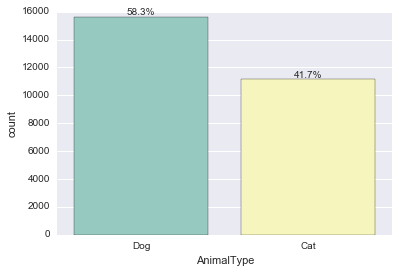

In [12]:
training_data = training_data.drop(['Breed'], axis=1) #Drop columns that will not be utilized)
test_data = test_data.drop(['Breed'], axis=1) #Drop columns that will not be utilized)

ax = sns.countplot(training_data.AnimalType, palette='Set3')
add_percentages_to_graph(ax, ncount)

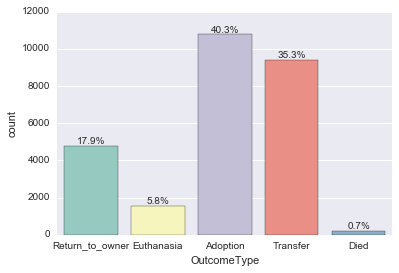

In [13]:
ax = sns.countplot(training_data.OutcomeType, palette='Set3')
add_percentages_to_graph(ax, ncount)

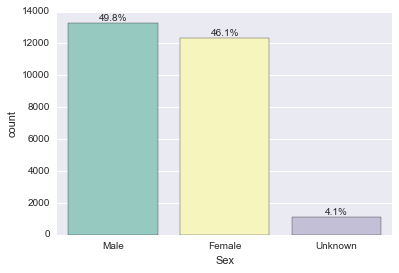

In [14]:
ax = sns.countplot(training_data.Sex, palette='Set3')
add_percentages_to_graph(ax, ncount)

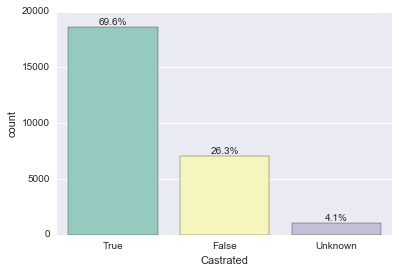

In [15]:
ax = sns.countplot(training_data.Castrated, palette='Set3')
add_percentages_to_graph(ax, ncount)

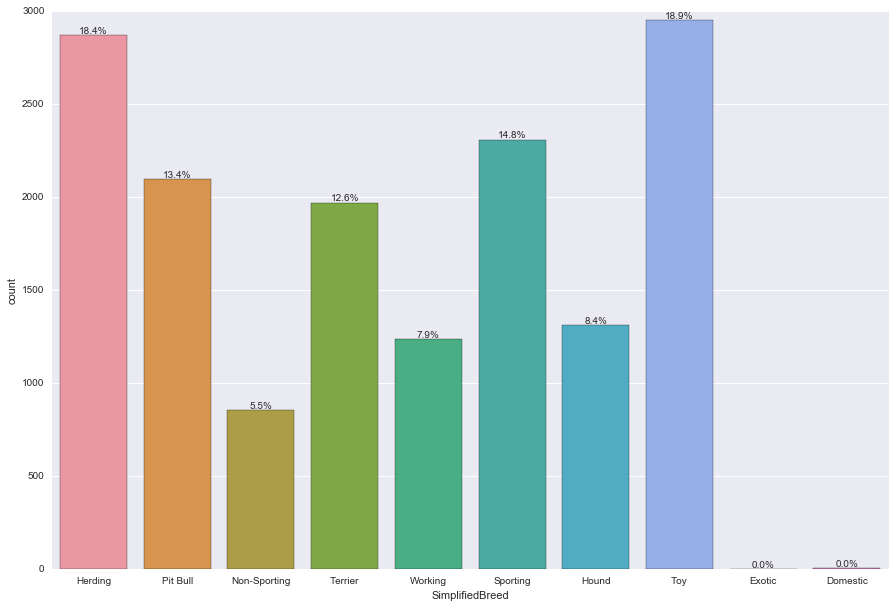

In [16]:
f, (ax1) = plt.subplots(1, figsize=(15, 10))
sns.countplot(data=training_data.loc[training_data['AnimalType'] == 'Dog'], x='SimplifiedBreed', ax=ax1)
add_percentages_to_graph(ax1, len(training_data.loc[training_data['AnimalType'] == 'Dog']))

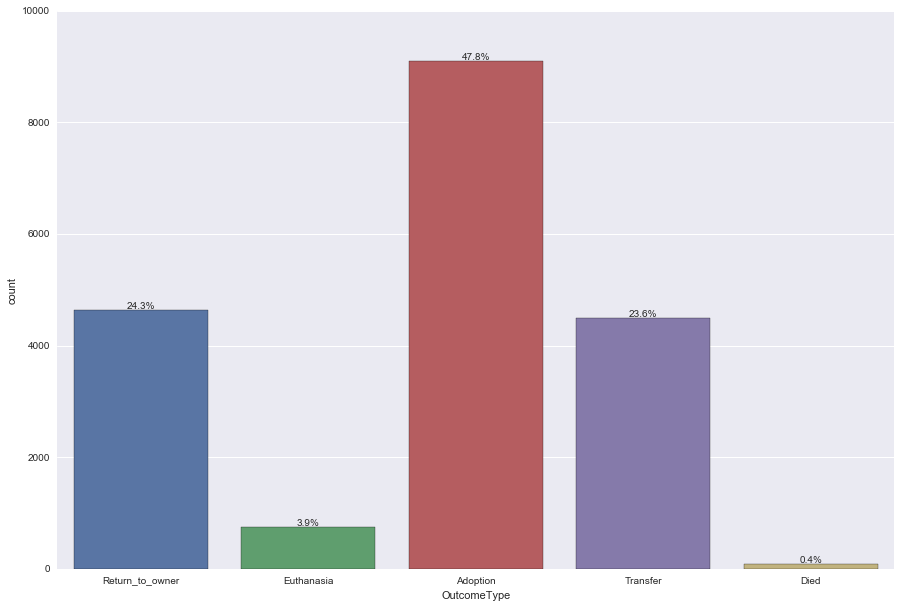

In [17]:
f, (ax1) = plt.subplots(1, figsize=(15, 10))
sns.countplot(data=training_data.loc[training_data['HasName'] == True], x='OutcomeType', ax=ax1)
add_percentages_to_graph(ax1, len(training_data.loc[training_data['HasName'] == True]))

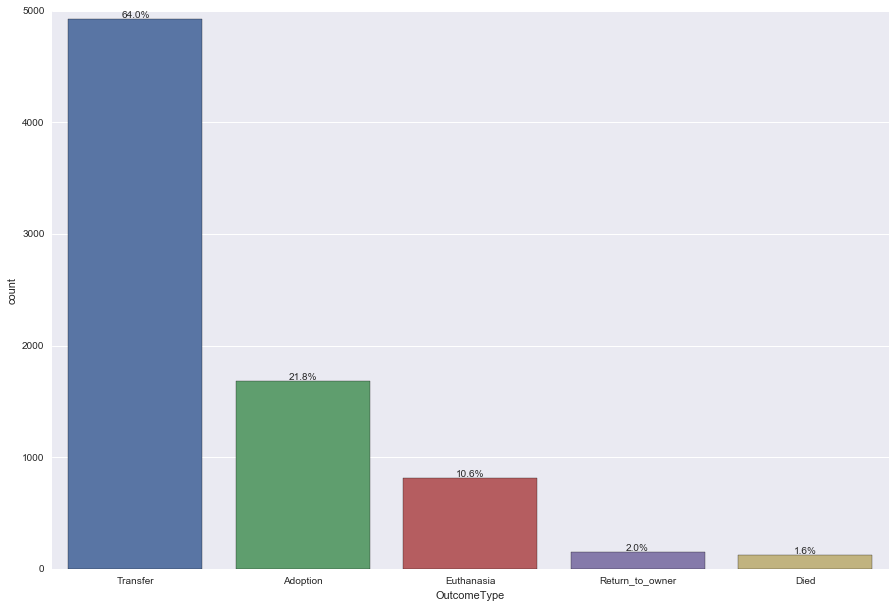

In [18]:
f, (ax1) = plt.subplots(1, figsize=(15, 10))
sns.countplot(data=training_data.loc[training_data['HasName'] == False], x='OutcomeType', ax=ax1)
add_percentages_to_graph(ax1, len(training_data.loc[training_data['HasName'] == False]))

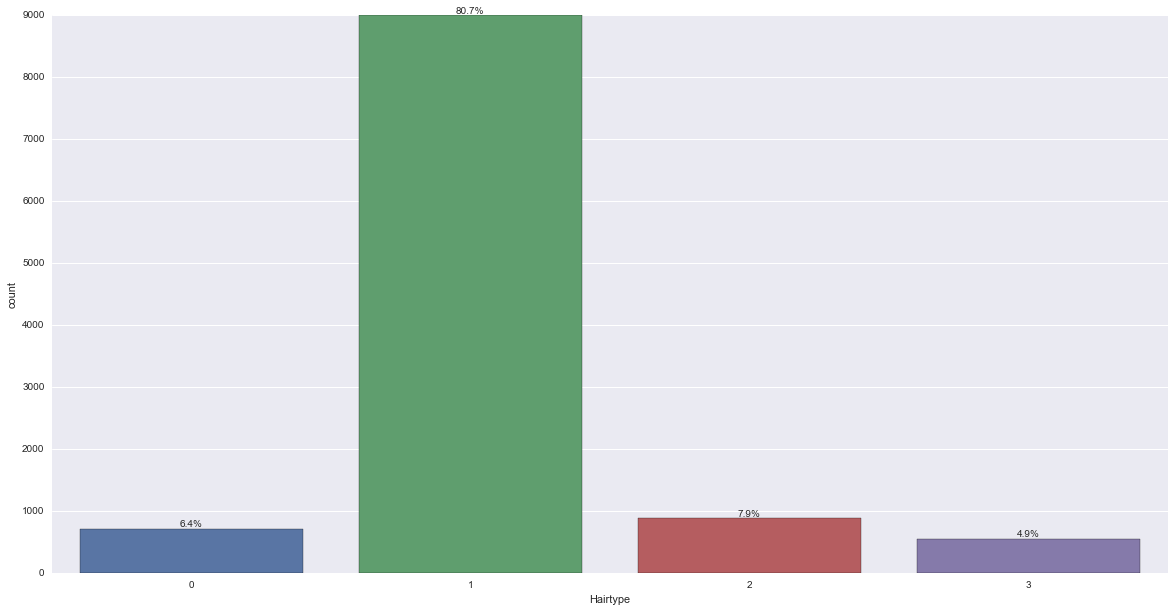

In [19]:
f, (ax1) = plt.subplots(1, figsize=(20, 10))
sns.countplot(data=training_data.loc[training_data['AnimalType'] == 'Cat'], x='Hairtype', ax=ax1)
add_percentages_to_graph(ax1, len(training_data.loc[training_data['AnimalType'] == 'Cat']))

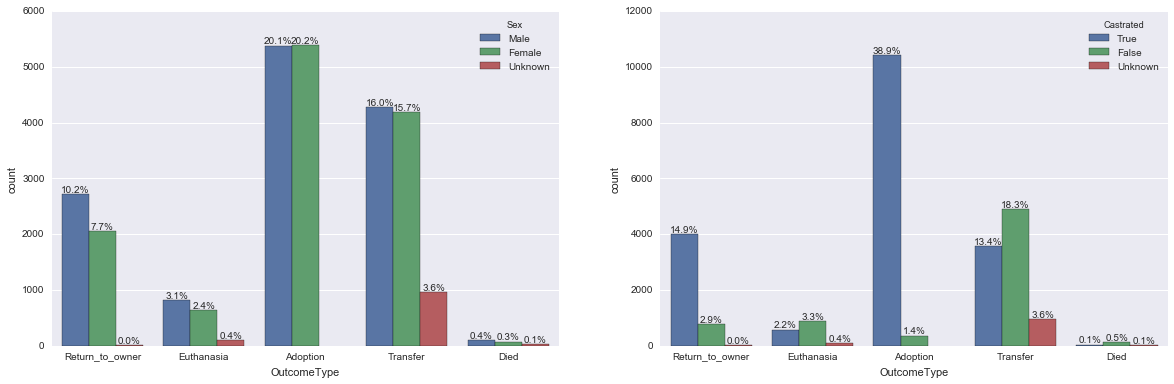

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
sns.countplot(data=training_data, x='OutcomeType',hue='Sex', ax=ax1)
sns.countplot(data=training_data, x='OutcomeType',hue='Castrated', ax=ax2)
add_percentages_to_graph(ax1, ncount)
add_percentages_to_graph(ax2, ncount)

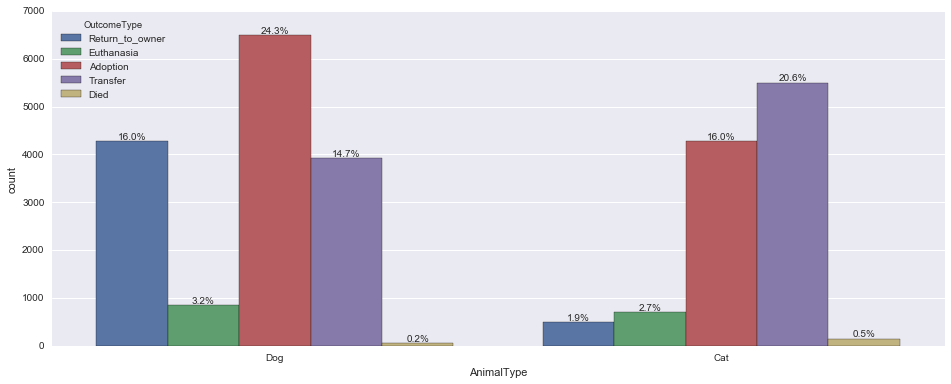

In [21]:
f, (ax1) = plt.subplots(1, figsize=(16, 6))
sns.countplot(data=training_data, x='AnimalType',hue='OutcomeType', ax=ax1)
add_percentages_to_graph(ax1, ncount)

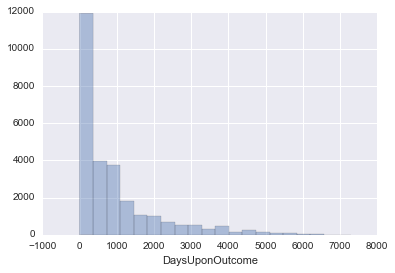

In [22]:
sns.distplot(training_data.DaysUponOutcome, bins = 20, kde=False)

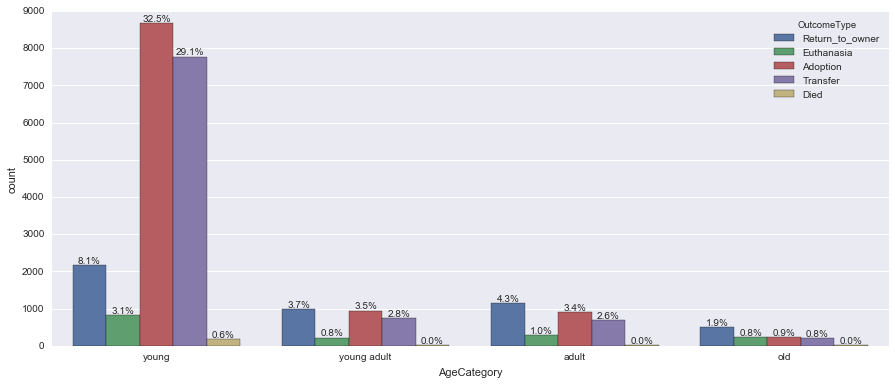

In [23]:
def calc_age_category(x):
    if x < (3 * 365): return 'young'
    if x < (5 * 365): return 'young adult'
    if x < (10 * 365): return 'adult'
    return 'old'

training_data['AgeCategory'] = training_data.DaysUponOutcome.apply(calc_age_category)

f, ( ax2) = plt.subplots(1, figsize=(15, 6))
#sns.countplot(data=training_data, x='OutcomeType',hue='AgeCategory', ax=ax1)
sns.countplot(data=training_data, x='AgeCategory',hue='OutcomeType', ax=ax2)
#add_percentages_to_graph(ax1, ncount)
add_percentages_to_graph(ax2, ncount)

In [24]:
#training_data = training_data.dropna(how="any")

numeric_data_set = training_data.copy(deep=True)


numeric_data_set['AnimalType'] = numeric_data_set['AnimalType'].map({'Dog' : 1, 'Cat' : 2}).fillna(-1)
numeric_data_set['Sex'] = numeric_data_set['Sex'].map({'Male' : 1, 'Female' : 2, 'Unknown' : 0}).fillna(-1)
numeric_data_set['HasName'] = numeric_data_set['HasName'].map({True : 1, False : 0}).fillna(-1)
numeric_data_set['Castrated'] = numeric_data_set['Castrated'].map({True : 1, False : 0, 'Unknown' : 2, None : 2}).fillna(-1)
numeric_data_set['IsMix'] = numeric_data_set['IsMix'].map({True : 1, False : 0}).fillna(-1)
numeric_data_set['Cross'] = numeric_data_set['Cross'].map({True : 1, False : 0}).fillna(-1)
numeric_data_set['Miniature'] = numeric_data_set['Miniature'].map({True : 1, False : 0}).fillna(-1)
numeric_data_set['IsAggressive'] = numeric_data_set['IsAggressive'].map({True : 1, False : 0}).fillna(-1)
numeric_data_set['SimplifiedBreed'] = numeric_data_set['SimplifiedBreed'].map({'Herding' : 1, 'Pit Bull' : 2, 'Domestic Shorthair' : 3, 'Terrier' : 4, 'Non-Sporting' : 5, 'Working' : 6, 'Sporting' : 7, 'Hound' : 8, 'Toy' : 9, 'Exotic' : 10, 'Domestic Medium Hair' : 11, 'Domestic Longhair' : 12,'Domestic' : 13, 'Siamese' : 14}).fillna(-1)
numeric_data_set['Coat'] = numeric_data_set['Coat'].map({'None' : 0, 'Tabby' : 1, 'Brindle' : 2, 'Calico' : 3, 'Torbie' : 4, 'Tricolor' : 5, 'Tortie' : 6, 'Point' : 7, 'Tick' : 8, 'Merle' : 9, 'Sable' : 10, 'Tiger' : 11, 'Agouti' : 12, 'Ruddy' : 13}).fillna(-1)
numeric_data_set['Color1'] = numeric_data_set['Color1'].map({'None' : 0, 'Brown' : 1, 'Cream' : 2, 'Blue' : 3, 'Tan' : 4, 'Black' : 5, 'Red' : 6, 'White' : 7, 'Silver' : 8, 'Orange' : 9, 'Chocolate' : 10, 'Yellow' : 11, 'Gray' : 12, 'Buff' : 13, 'Seal' : 14, 'Fawn' : 15, 'Flame' : 16, 'Liver' : 17, 'Apricot' : 18, 'Lynx' : 19, 'Lilac' : 20, 'Gold' : 21, 'Smoke' : 22, 'Pink' : 23}).fillna(-1)
numeric_data_set['Color2'] = numeric_data_set['Color2'].map({'None' : 0, 'Brown' : 1, 'Cream' : 2, 'Blue' : 3, 'Tan' : 4, 'Black' : 5, 'Red' : 6, 'White' : 7, 'Silver' : 8, 'Orange' : 9, 'Chocolate' : 10, 'Yellow' : 11, 'Gray' : 12, 'Buff' : 13, 'Seal' : 14, 'Fawn' : 15, 'Flame' : 16, 'Liver' : 17, 'Apricot' : 18, 'Lynx' : 19, 'Lilac' : 20, 'Gold' : 21, 'Smoke' : 22, 'Pink' : 23}).fillna(-1)

numeric_data_set['OutcomeType'] = numeric_data_set['OutcomeType'].map({'Adoption' : 0, 'Died' : 1, 'Euthanasia' : 2, 'Return_to_owner' : 3, 'Transfer' : 4})

#numeric_data_set = numeric_data_set.drop(['Coat', 'Color1', 'Color2', 'AgeCategory'], axis=1) #Drop columns that will not be utilized
numeric_data_set = numeric_data_set.drop(['AgeCategory'], axis=1) #Drop columns that will not be utilized
numeric_data_set.head(10)

,OutcomeType,AnimalType,DaysUponOutcome,HasName,Sex,Castrated,Coat,Color1,Color2,IsMix,Cross,Miniature,Hairtype,IsAggressive,SimplifiedBreed
0,3,1,365.0,1,1.0,1,0,1,7,1,0,0,0,0,1
1,2,2,365.0,1,2.0,1,1,2,0,1,0,0,1,0,3
2,0,1,730.0,1,1.0,1,0,3,7,1,0,0,0,1,2
3,4,2,21.0,0,1.0,0,0,3,2,1,0,0,1,0,3
4,4,1,730.0,0,1.0,1,0,4,0,0,1,1,0,0,5
5,4,1,30.0,1,2.0,0,0,5,4,0,1,0,1,0,4
6,4,2,21.0,1,1.0,0,1,3,0,1,0,0,1,0,3
7,4,2,21.0,0,0.0,2,1,1,0,1,0,0,1,0,3
8,0,1,150.0,1,2.0,1,0,6,7,1,0,0,0,1,4
9,0,1,365.0,0,2.0,1,0,7,0,0,0,0,0,0,4


In [25]:
#test_data = test_data.dropna(how="any")

test_data['AnimalType'] = test_data['AnimalType'].map({'Dog' : 1, 'Cat' : 2}).fillna(-1)
test_data['Sex'] = test_data['Sex'].map({'Male' : 1, 'Female' : 2, 'Unknown' : 0}).fillna(-1)
test_data['HasName'] = test_data['HasName'].map({True : 1, False : 0}).fillna(-1)
test_data['Castrated'] = test_data['Castrated'].map({True : 1, False : 0, 'Unknown' : 2, None : 2}).fillna(-1)
test_data['IsMix'] = test_data['IsMix'].map({True : 1, False : 0}).fillna(-1)
test_data['Cross'] = test_data['Cross'].map({True : 1, False : 0}).fillna(-1)
test_data['Miniature'] = test_data['Miniature'].map({True : 1, False : 0}).fillna(-1)
test_data['IsAggressive'] = test_data['IsAggressive'].map({True : 1, False : 0}).fillna(-1)
test_data['SimplifiedBreed'] = test_data['SimplifiedBreed'].map({'Herding' : 1, 'Pit Bull' : 2, 'Domestic Shorthair' : 3, 'Terrier' : 4, 'Non-Sporting' : 5, 'Working' : 6, 'Sporting' : 7, 'Hound' : 8, 'Toy' : 9, 'Exotic' : 10, 'Domestic Medium Hair' : 11, 'Domestic Longhair' : 12,'Domestic' : 13, 'Siamese' : 14}).fillna(-1)
test_data['Coat'] = test_data['Coat'].map({'None' : 0, 'Tabby' : 1, 'Brindle' : 2, 'Calico' : 3, 'Torbie' : 4, 'Tricolor' : 5, 'Tortie' : 6, 'Point' : 7, 'Tick' : 8, 'Merle' : 9, 'Sable' : 10, 'Tiger' : 11, 'Agouti' : 12, 'Ruddy' : 13}).fillna(-1)
test_data['Color1'] = test_data['Color1'].map({'None' : 0, 'Brown' : 1, 'Cream' : 2, 'Blue' : 3, 'Tan' : 4, 'Black' : 5, 'Red' : 6, 'White' : 7, 'Silver' : 8, 'Orange' : 9, 'Chocolate' : 10, 'Yellow' : 11, 'Gray' : 12, 'Buff' : 13, 'Seal' : 14, 'Fawn' : 15, 'Flame' : 16, 'Liver' : 17, 'Apricot' : 18, 'Lynx' : 19, 'Lilac' : 20, 'Gold' : 21, 'Smoke' : 22, 'Pink' : 23}).fillna(-1)
test_data['Color2'] = test_data['Color2'].map({'None' : 0, 'Brown' : 1, 'Cream' : 2, 'Blue' : 3, 'Tan' : 4, 'Black' : 5, 'Red' : 6, 'White' : 7, 'Silver' : 8, 'Orange' : 9, 'Chocolate' : 10, 'Yellow' : 11, 'Gray' : 12, 'Buff' : 13, 'Seal' : 14, 'Fawn' : 15, 'Flame' : 16, 'Liver' : 17, 'Apricot' : 18, 'Lynx' : 19, 'Lilac' : 20, 'Gold' : 21, 'Smoke' : 22, 'Pink' : 23}).fillna(-1)

test_data.head(10)

,ID,AnimalType,DaysUponOutcome,HasName,Sex,Castrated,Coat,Color1,Color2,IsMix,Cross,Miniature,Hairtype,IsAggressive,SimplifiedBreed
0,1,1,300.0,1,2,0,0,6,7,1,0,0,0,0,7
1,2,1,730.0,1,2,1,0,5,4,0,1,0,0,1,1
2,3,2,365.0,1,1,1,1,1,0,1,0,0,1,0,3
3,4,1,120.0,1,1,0,5,0,0,1,0,0,0,0,1
4,5,1,730.0,1,1,1,0,7,0,1,0,1,0,0,5
5,6,1,1095.0,1,1,1,0,1,7,1,0,0,0,0,8
6,7,2,4745.0,1,1,1,1,1,7,1,0,0,2,0,11
7,8,2,180.0,1,2,1,1,1,0,1,0,0,1,0,3
8,9,1,90.0,1,2,1,0,5,2,0,0,0,0,0,4
9,10,1,365.0,1,2,1,0,1,7,1,0,0,0,1,2


In [26]:
from sklearn.ensemble import RandomForestClassifier

n_iter = 1000
k_fold = 10

training_numeric_data_set = numeric_data_set.copy(deep=True)
training_numeric_data_set = training_numeric_data_set.drop('OutcomeType', axis=1)
target = numeric_data_set["OutcomeType"].values

key_features = ['AnimalType', 'DaysUponOutcome', 'HasName', 'Sex', 'Castrated', 'Coat', 'Color1', 'Color2', 'IsMix', 'Cross', 'Miniature', 'Hairtype', 'IsAggressive', 'SimplifiedBreed']

In [27]:
# Building and fitting my_forest
forest = RandomForestClassifier(n_estimators=n_iter, random_state=1)
my_forest = forest.fit(training_numeric_data_set, target)

Random forests model score: 
0.838976392682


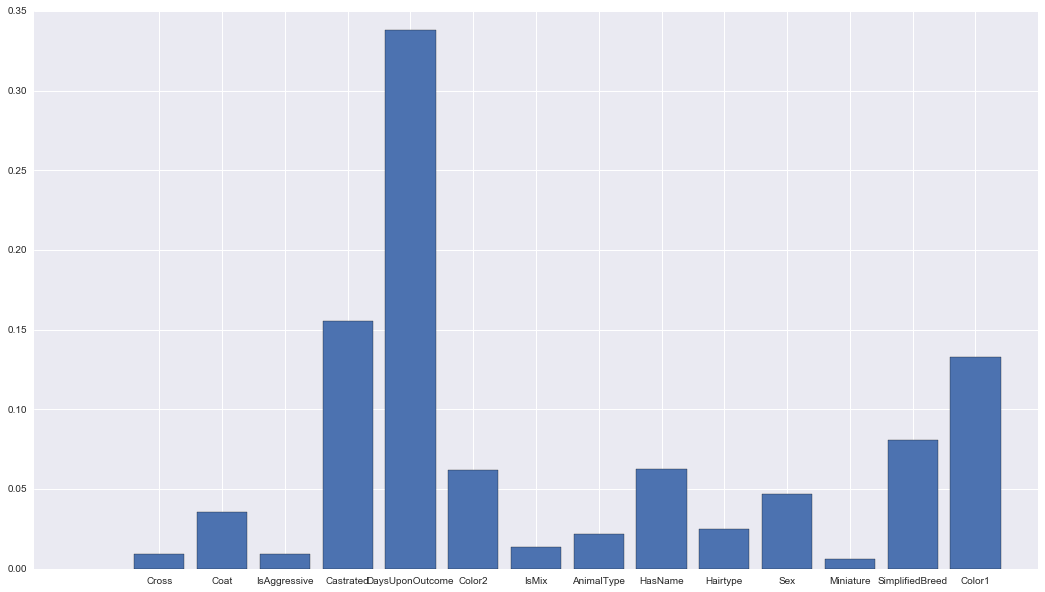

In [28]:
print('Random forests model score: ')
print(my_forest.score(training_numeric_data_set, target))
#print(my_forest.feature_importances_)

importances = my_forest.feature_importances_

count = 0
dict_imp = {}
for imp in importances:
    dict_imp[key_features[count]] = imp
    count += 1
    
#print(dict_imp)

D = dict_imp

f, (ax1) = plt.subplots(1, figsize=(18, 10))
plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), D.keys())

plt.show()

In [34]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

Y = numeric_data_set['OutcomeType'].values
kfold_obj = KFold(n=len(training_numeric_data_set), n_folds=k_fold, random_state=42)

In [ ]:
from sklearn import tree

# initialize the classifiers
clf_model = tree.DecisionTreeClassifier()
clf_model.fit(training_numeric_data_set, target)

results = cross_val_score(clf_model, training_numeric_data_set, Y, cv=kfold_obj)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

prediction = clf_model.predict_proba(test_data[key_features])

print('Decision tree model score: ')
print(clf_model.score(training_numeric_data_set, target))

importances = clf_model.feature_importances_

count = 0
dict_imp = {}
for imp in importances:
    dict_imp[key_features[count]] = imp
    count += 1

D = dict_imp

f, (ax1) = plt.subplots(1, figsize=(18, 10))
plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), D.keys())

plt.show()

In [ ]:
results = cross_val_score(my_forest, training_numeric_data_set, Y, cv=kfold_obj)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [29]:
import xgboost as xgb

# initialize the classifier
xgb_model = xgb.XGBClassifier(n_estimators=n_iter, learning_rate=0.05, objective='multi:softprob', nthread=3).fit(training_numeric_data_set, target, eval_metric='mlogloss')

In [ ]:
results = cross_val_score(xgb_model, training_numeric_data_set, Y, cv=kfold_obj)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
#print(xgb_model.feature_importances_)
#training_numeric_data_set.head()

xgb.plot_importance(xgb_model)

In [ ]:
prediction = xgb_model.predict_proba(test_data[key_features])
print(len(prediction))

#print(test_data.iloc[0][key_features])

In [ ]:
import csv

header = ['ID', 'Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer']

file_name = 'submission_kaggle_shelter_Bruno_and_Eduardo_2.csv'

with open('submissions/'+file_name, 'w') as csvfile:
        writer = csv.writer(csvfile,dialect='excel')
        writer.writerow(list(header))
        
        for i in range(0, len(prediction)):
            row = []
            row.append(i+1) #ID
            for k in prediction[i]:
                row.append('%0.10f' % k)
            writer.writerow(list(row))
            
print('finished')

In [41]:
from sklearn.cross_validation import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(training_numeric_data_set, Y, test_size=0.20, random_state=42)

In [38]:
from matplotlib import cm

def confusion_probs(predictions, labels, ax = None, vmargin = 0.1, equalize = False, cmap = cm.jet, colors = [],ticklabels=[]):
    """
        Make a confusion-matrix-like scatter plot
    """
    N, D = predictions.shape
    bins = bincount(labels)
    assert labels.min() >= 0 and labels.max() < D, 'labels should be between 0 and {0:d}'.format(D - 1)
    assert predictions.min() >= 0 and predictions.max() <= 1, 'predictions should be normalized (to [0, 1])'
    """ Set up graphical stuff. """
    fig = None
    if ax is None:
        fig, ax = subplots(figsize = (7, 7))
        fig.tight_layout()
    if equalize:
        xticks = [x + .5 for x in range(D)]
        bin_left = range(D)
        bin_right = range(1,D+1)
    else:
        xticks = (float(D) / N) * (cumsum(bins) - bins / 2)
        bin_left = (float(D) / N) * (cumsum(bins) - bins)
        bin_right = (float(D) / N) * (cumsum(bins))
        
    ax.set_xticks(xticks)
    if len(ticklabels) == 0:
        ax.set_xticklabels(range(D))
    else:
        ax.set_xticklabels(ticklabels,rotation=90)
        
    ax.set_xlim([0, D])
    ax.set_yticks([(x + .5) * (1 + vmargin) for x in range(D)])
    if len(ticklabels) == 0:
        ax.set_yticklabels(range(D))
    else:
        ax.set_yticklabels(ticklabels)
    
    
    ax.set_ylim([0, D * (1 + vmargin) - vmargin])
    ax.set_xlabel('True classes')
    ax.set_ylabel('Prediction probabilities')
    """ Sort predictions by label. """
    indices = labels.argsort()
    X = predictions[indices, :]
    y = labels[indices]
    """ Add more vertical offset to higher labels. """
    X += linspace(0, D - 1, D) * (1 + vmargin)
    """ Make a new horizontal axis to give all samples equal width. """
    if equalize:
        z = hstack([k + linspace(0, 1, t) for k, t in enumerate(bins)])
    else:
        z = linspace(0, D, N)
    """ Plot the results with class-coding. """
    if len(colors) == 0:
        colors = []
        for q in range(D):
            colors.append(cmap(y / float(D)))
    for q in range(D):
        row = X[:, q]
        for qq in range(D):
            if qq == 3:
                ax.scatter(z[(z > bin_left[qq])&(z<bin_right[qq])], row[(z > bin_left[qq])&(z<bin_right[qq])], c = colors[qq], edgecolors = 'k',linewidth=0.1,s=5)
            else:
                ax.scatter(z[(z > bin_left[qq])&(z<bin_right[qq])], row[(z > bin_left[qq])&(z<bin_right[qq])], c = colors[qq],edgecolor='None',s=5)
    plt.tight_layout()
    return (fig, ax) if fig else ax

In [66]:
from sklearn import preprocessing

ROUNDS=2275

params = {}
params["objective"] = "multi:softprob"
params["eta"] = 0.005
# params["min_child_weight"] = 2
params["silent"] = 1
params["max_depth"] = 8
params["n_estimators"] = 300
params["colsample_by_tree"] = 0.9
params["eval_metric"] = "mlogloss"
params["subsample"] = 0.67
params["nthread"] = 1
params["seed"] = 56
params["missing"] = np.nan
#params["gamma"] = 0.3
params["num_class"] = 5

plst = list(params.items())

"""for f in X_valid.columns: 
    if X_valid[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder() 
        lbl.fit(list(X_valid[f].values)) 
        X_valid[f] = lbl.transform(list(X_valid[f].values))"""
        
xgtrain = xgb.DMatrix(X_train.values, label=y_train, feature_names=X_train.columns,missing=np.nan)

model = xgb.train(plst, xgtrain, ROUNDS)

#model = xgb.XGBClassifier()
#model.fit(X_train, y_train)


Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000000004F65CE10>>
Traceback (most recent call last):
  File "C:\Users\Bruno\Anaconda\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\core.py", line 337, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'
Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000000004FA65160>>
Traceback (most recent call last):
  File "C:\Users\Bruno\Anaconda\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\core.py", line 337, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'
Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000000004FA6C5C0>>
Traceback (most recent call last):
  File "C:\Users\Bruno\Anaconda\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\core.py", line 337, in __del__
    _check_call(_LIB.X

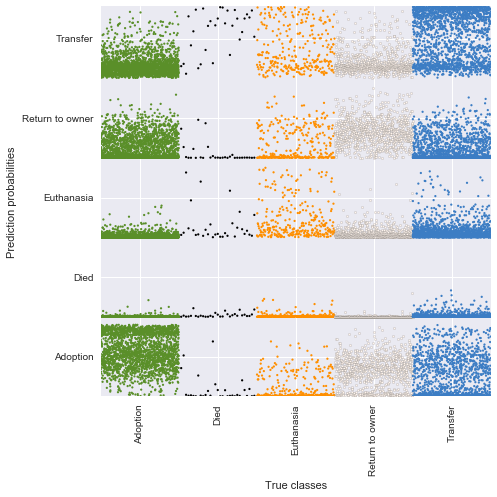

In [70]:
from numpy import linspace, bincount, hstack, cumsum
from matplotlib.pyplot import subplots, show

xgval = xgb.DMatrix(X_valid.values, label=y_valid, feature_names=X_train.columns)
y_val = model.predict(xgval)

colors = ['#5A8F29','k','#FF8F00','#FFF5EE','#3C7DC4']
ticklabels = ['Adoption','Died','Euthanasia','Return to owner','Transfer']
fig, ax = confusion_probs(y_val, y_valid, equalize = True,colors = colors,ticklabels = ticklabels)